In [1]:
import pickle
import numpy as np
import sys,os
from google.colab import drive
drive.mount('/content/drive')
from scipy.sparse import load_npz
from util1 import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Upload example data

In [2]:
# An example of neighborhood motif discovery of SMAD5 using chromosome 2

# To generate inputs in more chromosomes, you can use 'util1.generate_inputs' function with files 
#   'example/input_sample_poi.pickle' and downloaded reference genome data

with open('/content/drive/My Drive/echo/input_sample_poi.pickle','rb') as f:
  input_sample_poi=pickle.load(f)
with open('chromatin_feature.pickle','rb') as f:
  chromatin_feature=pickle.load(f)
inputs={}
labels={}
neighs={}
inputs[2]=np.load('/content/drive/My Drive/echo/chr2.npy')
neighs[2]=np.load('/content/drive/My Drive/echo/neighbors_chr2.npy')
print(neighs[2].shape,inputs[2].shape)
labels[2]=load_npz('/content/drive/My Drive/echo/labels/chr2.npz')

(249962, 61) (249962, 4, 1000)


# generate the neighborhood motif for RBFOX2

In [4]:
inspect_tf='RBFOX2'
sequence_grad,sequence_input= filter_sequence(inputs,neighs,labels,input_sample_poi, inspect_tf
                                              ,contact_threshold=0.5, score_threshold=0.3)
# contact_threshold: the threshold to filter contacts with low attribution scores
# score_threshold: the threshold to filter binding sites with low prediction scores
print('The number of selected sequence to generate neighborhood motif is %s'%(sequence_grad.shape[0]))

cuda:0
[614 680]
(14390,)
1 sequences are found
5 sequences are found
6 sequences are found
9 sequences are found
10 sequences are found
11 sequences are found
13 sequences are found
14 sequences are found
15 sequences are found
16 sequences are found
26 sequences are found
27 sequences are found
28 sequences are found
29 sequences are found
30 sequences are found
31 sequences are found
33 sequences are found
35 sequences are found
36 sequences are found
41 sequences are found
42 sequences are found
45 sequences are found
46 sequences are found
48 sequences are found
51 sequences are found
52 sequences are found
53 sequences are found
54 sequences are found
55 sequences are found
59 sequences are found
60 sequences are found
61 sequences are found
62 sequences are found
66 sequences are found
67 sequences are found
72 sequences are found
73 sequences are found
75 sequences are found
77 sequences are found
78 sequences are found
80 sequences are found
81 sequences are found
83 sequences

#Run TF-MoDISco to generate motifs from neighbor sequences' attribution scores

In [9]:
# !pip install modisco
# generate neighborhood patterns with 300 neighbor sequences' attribution scores
import modisco
from collections import OrderedDict
task_to_scores = OrderedDict()
task_to_hyp_scores = OrderedDict()
# print(sequence_grad.shape)
gradient=sequence_grad[:400,:,:]
gradient=np.swapaxes(np.array(gradient),1,2)
input=sequence_input[:400,:,:]
input=np.swapaxes(input,1,2)
tasks=["task0"]
for task in tasks:
    task_to_scores[task] = [gradient[i,:,:]*input[i,:,:] for i in range(gradient.shape[0])]
    task_to_hyp_scores[task] = [gradient[i,:,:] for i in range(gradient.shape[0])]
onehot_data =[input[i,:,:] for i in range(gradient.shape[0])]

MEMORY 15.13650176
On task task0
Computing windowed sums on original
Generating null dist
peak(mu)= 0.0006239763461053373
Computing threshold
For increasing = True , the minimum IR precision was 0.43517799272508184 occurring at 0.0 implying a frac_neg of 0.7704692577838346
To be conservative, adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.20673342269179218 occurring at -1.7881393432617188e-07 implying a frac_neg of 0.2606102773084187
To be conservative, adjusted frac neg is 0.95
Thresholds from null dist were -0.21615362167358398  and  0.15731489658355713 with frac passing 0.02465816326530612
Passing windows frac was 0.02465816326530612 , which is below  0.03 ; adjusting
Final raw thresholds are -0.16621819734573362  and  0.16621819734573362
Final transformed thresholds are -0.97  and  0.97


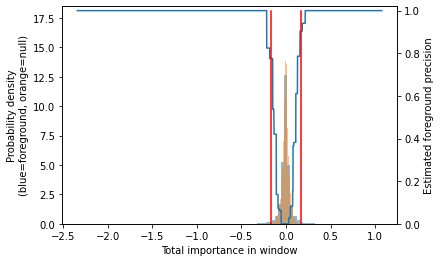

Got 1050 coords
After resolving overlaps, got 1050 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9699
MEMORY 15.136505856
1050 identified in total
2 activity patterns with support >= 100 out of 2 possible patterns
Metacluster sizes:  [568, 482]
Idx to activities:  {0: '-1', 1: '1'}
MEMORY 15.136505856
On metacluster 1
Metacluster size 482
Relevant tasks:  ('task0',)
Relevant signs:  (1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 482
(Round 1) Computing coarse affmat
MEMORY 15.136505856
Beginning embedding computation
MEMORY 15.136505856


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   17.6s
[Parallel(n_jobs=4)]: Done 482 out of 482 | elapsed:   22.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   17.6s
[Parallel(n_jobs=4)]: Done 482 out of 482 | elapsed:   23.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 482 out of 482 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Constructing csr matrix...
csr matrix made in 0.10803747177124023 s


[Parallel(n_jobs=1)]: Done 482 out of 482 | elapsed:    1.4s finished


Constructing csr matrix...
csr matrix made in 0.10381221771240234 s
Finished embedding computation in 49.57 s
MEMORY 15.159484416
Starting affinity matrix computations
MEMORY 15.159484416
Batching in slices of size 482


100%|██████████| 1/1 [00:01<00:00,  1.65s/it]

Finished affinity matrix computations in 1.66 s
MEMORY 15.158181888
(Round 1) Computed coarse affmat
MEMORY 15.155367936
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 15.155367936
Launching nearest neighbors affmat calculation job
MEMORY 15.155367936


Parallel runs completed
MEMORY 15.154069504
Job completed in: 4.99 s
MEMORY 15.153078272
Launching nearest neighbors affmat calculation job
MEMORY 15.153078272
Parallel runs completed
MEMORY 15.153057792
Job completed in: 4.99 s
MEMORY 15.153057792
(Round 1) Computed affinity matrix on nearest neighbors in 10.17 s
MEMORY 15.153057792
Filtered down to 475 of 482
(Round 1) Retained 475 rows out of 482 after filtering
MEMORY 15.153086464
(Round 1) Computing density adapted affmat
MEMORY 15.153086464
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 1) Computing clustering
MEMORY 15.151812608
Beginning preprocessing + Leiden
Affmat shape: 475


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.6s


Quality: 0.01738522864012756
Quality: 0.01744432071258006
Quality: 0.017504378359427912
Quality: 0.01750452984388804
Quality: 0.017505214685772704
Got 5 clusters after round 1
Counts:
{1: 109, 0: 189, 3: 70, 2: 75, 4: 32}
MEMORY 15.151812608
(Round 1) Aggregating seqlets in each cluster
MEMORY 15.151812608
Aggregating for cluster 0 with 189 seqlets
MEMORY 15.151812608


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   10.0s finished


Skipped 1 seqlets that went over sequence edge during flank expansion
Skipped 3 due to duplicates
Trimming eliminated 0 seqlets out of 185
Aggregating for cluster 1 with 109 seqlets
MEMORY 15.151583232
Skipped 10 due to duplicates
Trimming eliminated 0 seqlets out of 99
Aggregating for cluster 2 with 75 seqlets
MEMORY 15.151583232
Skipped 7 due to duplicates
Trimming eliminated 0 seqlets out of 68
Aggregating for cluster 3 with 70 seqlets
MEMORY 15.151583232
Skipped 7 due to duplicates
Trimming eliminated 0 seqlets out of 63
Aggregating for cluster 4 with 32 seqlets
MEMORY 15.151583232
Trimming eliminated 0 seqlets out of 32
(Round 2) num seqlets: 447
(Round 2) Computing coarse affmat
MEMORY 15.151583232
Beginning embedding computation
MEMORY 15.151583232


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   15.7s
[Parallel(n_jobs=4)]: Done 447 out of 447 | elapsed:   35.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   15.7s
[Parallel(n_jobs=4)]: Done 447 out of 447 | elapsed:   35.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 447 out of 447 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Constructing csr matrix...
csr matrix made in 0.09505581855773926 s


[Parallel(n_jobs=1)]: Done 447 out of 447 | elapsed:    1.3s finished


Constructing csr matrix...
csr matrix made in 0.09694290161132812 s
Finished embedding computation in 73.69 s
MEMORY 15.168856064
Starting affinity matrix computations
MEMORY 15.168856064
Batching in slices of size 447


100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

Finished affinity matrix computations in 1.38 s
MEMORY 15.168856064
(Round 2) Computed coarse affmat
MEMORY 15.166234624
(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 15.166234624
Launching nearest neighbors affmat calculation job
MEMORY 15.166234624


Parallel runs completed
MEMORY 15.165947904
Job completed in: 4.62 s
MEMORY 15.165947904
Launching nearest neighbors affmat calculation job
MEMORY 15.165947904
Parallel runs completed
MEMORY 15.165923328
Job completed in: 4.71 s
MEMORY 15.165923328
(Round 2) Computed affinity matrix on nearest neighbors in 9.5 s
MEMORY 15.165923328
Not applying filtering for rounds above first round
MEMORY 15.165923328
(Round 2) Computing density adapted affmat
MEMORY 15.165923328
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 2) Computing clustering
MEMORY 15.165198336
Beginning preprocessing + Leiden
Affmat shape: 447


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.5s


Quality: 0.02003373312615312
Quality: 0.020036084377598743
Got 5 clusters after round 2
Counts:
{0: 161, 2: 73, 3: 72, 1: 101, 4: 40}
MEMORY 15.165198336
(Round 2) Aggregating seqlets in each cluster
MEMORY 15.165198336
Aggregating for cluster 0 with 161 seqlets
MEMORY 15.165198336


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    8.6s finished


Skipped 12 due to duplicates
Trimming eliminated 0 seqlets out of 149
Aggregating for cluster 1 with 101 seqlets
MEMORY 15.165198336
Skipped 7 due to duplicates
Trimming eliminated 0 seqlets out of 94
Aggregating for cluster 2 with 73 seqlets
MEMORY 15.165198336
Skipped 5 due to duplicates
Trimming eliminated 0 seqlets out of 68
Aggregating for cluster 3 with 72 seqlets
MEMORY 15.165198336
Skipped 3 due to duplicates
Trimming eliminated 0 seqlets out of 69
Aggregating for cluster 4 with 40 seqlets
MEMORY 15.165198336
Skipped 2 due to duplicates
Trimming eliminated 0 seqlets out of 38
Got 5 clusters
Splitting into subclusters...
MEMORY 15.165198336
Inspecting pattern 0 for spurious merging
[t-SNE] Computed conditional probabilities for sample 149 / 149
[t-SNE] Mean sigma: 0.545381


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 130 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 149 out of 149 | elapsed:    0.1s finished


Beginning preprocessing + Leiden
Affmat shape: 149


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.5s


Quality: 0.2683718738369323
Quality: 0.26925075314156066
Got subclusters: Counter({0: 36, 1: 34, 2: 28, 3: 23, 4: 22, 5: 6})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    4.0s finished


Numbers for each pattern pre-subsample: [36, 34, 28, 23, 22, 6]
Numbers after subsampling: [36, 34, 28, 23, 22, 6]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.3454711437225342 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.2955946922302246 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.24009203910827637 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.22648978233337402 s
Computing sims for pattern 4
Computed sims for pattern 4 in 0.2133467197418213 s
Computing sims for pattern 5
Computed sims for pattern 5 in 0.08543777465820312 s
Cluster sizes
[36 34 28 23 22  6]
Cross-contamination matrix:
[[1.   0.5  0.62 0.47 0.79 0.94]
 [0.56 1.   0.39 0.54 0.55 0.71]
 [0.79 0.54 1.   0.47 0.7  0.87]
 [0.74 0.67 0.54 1.   0.66 0.65]
 [0.51 0.27 0.4  0.24 1.   0.61]
 [0.01 0.   0.02 0.   0.   1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.48 0.59 0.47 0.62 0.54]
 [0.48 1.   0.41 0.45 0.45 0.38]
 [0.59 0.41 1.   0.41 0.51 0.37]
 [0.4

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  94 out of  94 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Affmat shape: 94


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.2s


Quality: 0.30042702261409704
Got subclusters: Counter({0: 31, 1: 28, 2: 19, 3: 14, 4: 2})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.7s finished


Numbers for each pattern pre-subsample: [31, 28, 19, 14, 2]
Numbers after subsampling: [31, 28, 19, 14, 2]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.22658157348632812 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.19036269187927246 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.15742015838623047 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.13230466842651367 s
Computing sims for pattern 4
Computed sims for pattern 4 in 0.042771339416503906 s
Cluster sizes
[31 28 19 14  2]
Cross-contamination matrix:
[[1.   0.35 0.25 0.35 0.62]
 [0.5  1.   0.45 0.67 0.8 ]
 [0.38 0.43 1.   0.58 0.7 ]
 [0.15 0.27 0.21 1.   0.42]
 [0.   0.   0.   0.   1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.48 0.41 0.45 0.54]
 [0.48 1.   0.48 0.5  0.43]
 [0.41 0.48 1.   0.42 0.4 ]
 [0.45 0.5  0.42 1.   0.47]
 [0.54 0.43 0.4  0.47 1.  ]]
Inspecting pattern 2 for spurious merging
[t-SNE] Computed conditional probabilities for sample 68 / 68
[t-SNE

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 out of  68 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Affmat shape: 68


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s


Quality: 0.15767987015433296
Got subclusters: Counter({1: 24, 0: 24, 2: 18, 3: 2})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.6s finished


Numbers for each pattern pre-subsample: [24, 24, 18, 2]
Numbers after subsampling: [24, 24, 18, 2]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.11464047431945801 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.10962867736816406 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.10059189796447754 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.03165006637573242 s
Cluster sizes
[24 24 18  2]
Cross-contamination matrix:
[[1.   0.61 0.8  0.25]
 [0.14 1.   0.43 0.08]
 [0.5  0.76 1.   0.13]
 [0.   0.   0.   1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.45 0.66 0.28]
 [0.45 1.   0.8  0.26]
 [0.66 0.8  1.   0.27]
 [0.28 0.26 0.27 1.  ]]
Inspecting pattern 3 for spurious merging
[t-SNE] Computed conditional probabilities for sample 69 / 69
[t-SNE] Mean sigma: 0.741707
Beginning preprocessing + Leiden


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  69 out of  69 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Affmat shape: 69


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s


Quality: 0.12762033926511124
Quality: 0.12897049117727855
Got subclusters: Counter({0: 32, 1: 26, 2: 6, 3: 5})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.6s finished


Numbers for each pattern pre-subsample: [32, 26, 6, 5]
Numbers after subsampling: [32, 26, 6, 5]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.1579735279083252 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.12595272064208984 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.05398702621459961 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.04788517951965332 s
Cluster sizes
[32 26  6  5]
Cross-contamination matrix:
[[1.   0.55 0.63 0.17]
 [0.89 1.   0.87 0.49]
 [0.65 0.47 1.   0.18]
 [0.   0.   0.   1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.73 0.61 0.34]
 [0.73 1.   0.62 0.38]
 [0.61 0.62 1.   0.32]
 [0.34 0.38 0.32 1.  ]]
Inspecting pattern 4 for spurious merging
Merging on 20 clusters
MEMORY 15.165198336
On merging iteration 1
Numbers for each pattern pre-subsample: [36, 34, 28, 23, 22, 6, 31, 28, 19, 14, 2, 24, 24, 18, 2, 32, 26, 6, 5, 38]
Numbers after subsampling: [36, 34, 28, 23, 22, 6, 31, 28, 19, 14, 2, 24, 24, 1

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  38 out of  38 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


[t-SNE] Iteration 900: error = 0.5519133, gradient norm = 0.0000533 (50 iterations in 0.014s)
[t-SNE] Iteration 950: error = 0.5511551, gradient norm = 0.0000750 (50 iterations in 0.009s)
[t-SNE] Iteration 1000: error = 0.5459050, gradient norm = 0.0009623 (50 iterations in 0.008s)
[t-SNE] KL divergence after 1000 iterations: 0.545905
[t-SNE] Computed conditional probabilities for sample 38 / 38
[t-SNE] Mean sigma: 1125899906842624.000000
Beginning preprocessing + Leiden
Affmat shape: 38


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s


Quality: -1.4643841694806183e-13


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 38})
On pattern 1
[t-SNE] Computing 35 nearest neighbors...
[t-SNE] Indexed 36 samples in 0.001s...
[t-SNE] Computed neighbors for 36 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 36 / 36
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 41.3067818, gradient norm = 0.6176358 (50 iterations in 0.008s)
[t-SNE] Iteration 100: error = 44.3795395, gradient norm = 0.4343556 (50 iterations in 0.008s)
[t-SNE] Iteration 150: error = 46.3726425, gradient norm = 0.4643035 (50 iterations in 0.008s)
[t-SNE] Iteration 200: error = 46.0226593, gradient norm = 0.5551184 (50 iterations in 0.008s)
[t-SNE] Iteration 250: error = 41.2612839, gradient norm = 0.4272834 (50 iterations in 0.008s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.261284
[t-SNE] Iteration 300: error = 0.6283596, gradient norm = 0.0009790 (50 iterations in 0.008s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s


Quality: 2.2204460492503205e-16


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  34 out of  34 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 36})
On pattern 2
[t-SNE] Computing 33 nearest neighbors...
[t-SNE] Indexed 34 samples in 0.001s...
[t-SNE] Computed neighbors for 34 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 34 / 34
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 45.4729233, gradient norm = 0.3850566 (50 iterations in 0.008s)
[t-SNE] Iteration 100: error = 41.4449654, gradient norm = 0.6544425 (50 iterations in 0.008s)
[t-SNE] Iteration 150: error = 50.2451172, gradient norm = 0.5466656 (50 iterations in 0.008s)
[t-SNE] Iteration 200: error = 48.2897339, gradient norm = 0.4883336 (50 iterations in 0.008s)
[t-SNE] Iteration 250: error = 43.7723083, gradient norm = 0.5463325 (50 iterations in 0.008s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.772308
[t-SNE] Iteration 300: error = 0.5802802, gradient norm = 0.0008364 (50 iterations in 0.009s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s


Quality: -1.0069722833350307e-13


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  32 out of  32 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 34})
On pattern 3
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 32 samples in 0.001s...
[t-SNE] Computed neighbors for 32 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 32 / 32
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 45.0391502, gradient norm = 0.5915984 (50 iterations in 0.008s)
[t-SNE] Iteration 100: error = 41.5301819, gradient norm = 0.6421952 (50 iterations in 0.009s)
[t-SNE] Iteration 150: error = 41.7794228, gradient norm = 0.5639641 (50 iterations in 0.008s)
[t-SNE] Iteration 200: error = 42.5937386, gradient norm = 0.5189880 (50 iterations in 0.008s)
[t-SNE] Iteration 250: error = 48.9627533, gradient norm = 0.4000197 (50 iterations in 0.009s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.962753
[t-SNE] Iteration 300: error = 0.5347084, gradient norm = 0.0006481 (50 iterations in 0.008s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s


Quality: 2.0650148258028073e-14


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  31 out of  31 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 32})
On pattern 4
[t-SNE] Computing 30 nearest neighbors...
[t-SNE] Indexed 31 samples in 0.001s...
[t-SNE] Computed neighbors for 31 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 31 / 31
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 44.0677071, gradient norm = 0.6664385 (50 iterations in 0.009s)
[t-SNE] Iteration 100: error = 44.3436432, gradient norm = 0.4917835 (50 iterations in 0.009s)
[t-SNE] Iteration 150: error = 45.2626801, gradient norm = 0.4731013 (50 iterations in 0.008s)
[t-SNE] Iteration 200: error = 42.3066177, gradient norm = 0.4319640 (50 iterations in 0.008s)
[t-SNE] Iteration 250: error = 42.6013489, gradient norm = 0.7314947 (50 iterations in 0.007s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.601349
[t-SNE] Iteration 300: error = 0.7107455, gradient norm = 0.0011175 (50 iterations in 0.008s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s


Quality: 9.703349235223737e-14
Got subclusters: Counter({0: 31})
On metacluster 0
Metacluster size 568
Relevant tasks:  ('task0',)
Relevant signs:  (-1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 568
(Round 1) Computing coarse affmat
MEMORY 15.164674048
Beginning embedding computation
MEMORY 15.164674048


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   17.4s
[Parallel(n_jobs=4)]: Done 568 out of 568 | elapsed:   27.2s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 376 tasks      | elapsed:   17.5s
[Parallel(n_jobs=4)]: Done 568 out of 568 | elapsed:   27.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 568 out of 568 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Constructing csr matrix...
csr matrix made in 0.12375879287719727 s


[Parallel(n_jobs=1)]: Done 568 out of 568 | elapsed:    1.7s finished


Constructing csr matrix...
csr matrix made in 0.12322783470153809 s
Finished embedding computation in 58.52 s
MEMORY 15.183097856
Starting affinity matrix computations
MEMORY 15.1829504
Batching in slices of size 568


100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

Finished affinity matrix computations in 1.45 s
MEMORY 15.1829504
(Round 1) Computed coarse affmat
MEMORY 15.180853248
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 15.180853248


Launching nearest neighbors affmat calculation job
MEMORY 15.180853248
Parallel runs completed
MEMORY 15.180304384
Job completed in: 6.0 s
MEMORY 15.179804672
Launching nearest neighbors affmat calculation job
MEMORY 15.179804672
Parallel runs completed
MEMORY 15.179542528
Job completed in: 6.0 s
MEMORY 15.179542528
(Round 1) Computed affinity matrix on nearest neighbors in 12.22 s
MEMORY 15.17901824
Filtered down to 560 of 568
(Round 1) Retained 560 rows out of 568 after filtering
MEMORY 15.178756096
(Round 1) Computing density adapted affmat
MEMORY 15.178756096
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 1) Computing clustering
MEMORY 15.176777728
Beginning preprocessing + Leiden
Affmat shape: 560


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.9s


Quality: 0.018748986163425845
Quality: 0.018751448335361083
Quality: 0.018752378552835545
Quality: 0.018753646607550727
Quality: 0.018787187142193157
Got 4 clusters after round 1
Counts:
{1: 139, 2: 134, 0: 192, 3: 95}
MEMORY 15.176515584
(Round 1) Aggregating seqlets in each cluster
MEMORY 15.176515584
Aggregating for cluster 0 with 192 seqlets
MEMORY 15.176515584


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   12.5s finished


Skipped 19 due to duplicates
Trimming eliminated 0 seqlets out of 173
Aggregating for cluster 1 with 139 seqlets
MEMORY 15.175991296
Skipped 18 due to duplicates
Trimming eliminated 0 seqlets out of 121
Aggregating for cluster 2 with 134 seqlets
MEMORY 15.175991296
Skipped 3 due to duplicates
Trimming eliminated 0 seqlets out of 131
Aggregating for cluster 3 with 95 seqlets
MEMORY 15.175991296
Skipped 10 due to duplicates
Trimming eliminated 0 seqlets out of 85
(Round 2) num seqlets: 509
(Round 2) Computing coarse affmat
MEMORY 15.175991296
Beginning embedding computation
MEMORY 15.175991296


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   15.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   33.7s
[Parallel(n_jobs=4)]: Done 509 out of 509 | elapsed:   38.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   15.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   33.7s
[Parallel(n_jobs=4)]: Done 509 out of 509 | elapsed:   39.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 509 out of 509 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Constructing csr matrix...
csr matrix made in 0.10783815383911133 s


[Parallel(n_jobs=1)]: Done 509 out of 509 | elapsed:    1.5s finished


Constructing csr matrix...
csr matrix made in 0.1110680103302002 s
Finished embedding computation in 81.3 s
MEMORY 15.193534464
Starting affinity matrix computations
MEMORY 15.193534464
Batching in slices of size 509


100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

Finished affinity matrix computations in 1.42 s
MEMORY 15.193276416
(Round 2) Computed coarse affmat
MEMORY 15.191179264
(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 15.191179264
Launching nearest neighbors affmat calculation job
MEMORY 15.191179264


Parallel runs completed
MEMORY 15.191154688
Job completed in: 4.71 s
MEMORY 15.190392832
Launching nearest neighbors affmat calculation job
MEMORY 15.190392832
Parallel runs completed
MEMORY 15.190106112
Job completed in: 4.61 s
MEMORY 15.190106112
(Round 2) Computed affinity matrix on nearest neighbors in 9.51 s
MEMORY 15.189868544
Not applying filtering for rounds above first round
MEMORY 15.189868544
(Round 2) Computing density adapted affmat
MEMORY 15.189868544
Symmetrizing nearest neighbors
Computing betas for density adaptation
Computing normalizing denominators
(Round 2) Computing clustering
MEMORY 15.18831616
Beginning preprocessing + Leiden
Affmat shape: 509


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.6s


Quality: 0.019083182388291414
Quality: 0.01908766974561061
Quality: 0.019088053891396152
Got 5 clusters after round 2
Counts:
{0: 189, 1: 129, 4: 4, 3: 62, 2: 125}
MEMORY 15.18831616
(Round 2) Aggregating seqlets in each cluster
MEMORY 15.18831616
Aggregating for cluster 0 with 189 seqlets
MEMORY 15.18831616


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   11.2s finished


Skipped 6 due to duplicates
Trimming eliminated 0 seqlets out of 183
Aggregating for cluster 1 with 129 seqlets
MEMORY 15.18831616
Skipped 11 due to duplicates
Trimming eliminated 0 seqlets out of 118
Aggregating for cluster 2 with 125 seqlets
MEMORY 15.18831616
Skipped 3 due to duplicates
Trimming eliminated 0 seqlets out of 122
Aggregating for cluster 3 with 62 seqlets
MEMORY 15.18831616
Trimming eliminated 0 seqlets out of 62
Aggregating for cluster 4 with 4 seqlets
MEMORY 15.18831616
Trimming eliminated 0 seqlets out of 4
Got 5 clusters
Splitting into subclusters...
MEMORY 15.18831616
Inspecting pattern 0 for spurious merging
[t-SNE] Computed conditional probabilities for sample 183 / 183
[t-SNE] Mean sigma: 0.519424


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 130 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 183 out of 183 | elapsed:    0.1s finished


Beginning preprocessing + Leiden
Affmat shape: 183


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.6s


Quality: 0.3385684185987412
Quality: 0.33916360747015617
Quality: 0.33951377193621585
Got subclusters: Counter({0: 63, 1: 39, 2: 23, 3: 22, 4: 20, 5: 10, 6: 6})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    4.2s finished


Numbers for each pattern pre-subsample: [63, 39, 23, 22, 20, 10, 6]
Numbers after subsampling: [63, 39, 23, 22, 20, 10, 6]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.47847509384155273 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.40846800804138184 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.2575695514678955 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.2582728862762451 s
Computing sims for pattern 4
Computed sims for pattern 4 in 0.22013211250305176 s
Computing sims for pattern 5
Computed sims for pattern 5 in 0.14329004287719727 s
Computing sims for pattern 6
Computed sims for pattern 6 in 0.1067647933959961 s
Cluster sizes
[63 39 23 22 20 10  6]
Cross-contamination matrix:
[[1.   0.6  0.56 0.52 0.41 0.49 0.69]
 [0.62 1.   0.75 0.46 0.47 0.61 0.63]
 [0.41 0.52 1.   0.37 0.4  0.32 0.44]
 [0.64 0.55 0.61 1.   0.75 0.68 0.8 ]
 [0.07 0.08 0.12 0.13 1.   0.14 0.08]
 [0.08 0.14 0.06 0.11 0.12 1.   0.08]
 [0.33 0.26 0

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 102 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 118 out of 118 | elapsed:    0.1s finished


Beginning preprocessing + Leiden
Affmat shape: 118


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.3s


Quality: 0.21766523847655966
Quality: 0.21790848697543255
Quality: 0.21801414000230648
Quality: 0.2187190016286331
Quality: 0.2187539013027239
Got subclusters: Counter({0: 38, 1: 31, 2: 29, 3: 9, 4: 7, 5: 4})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.8s finished


Numbers for each pattern pre-subsample: [38, 31, 29, 9, 7, 4]
Numbers after subsampling: [38, 31, 29, 9, 7, 4]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.3492312431335449 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.27704620361328125 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.24494433403015137 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.11080431938171387 s
Computing sims for pattern 4
Computed sims for pattern 4 in 0.09579825401306152 s
Computing sims for pattern 5
Computed sims for pattern 5 in 0.0689699649810791 s
Cluster sizes
[38 31 29  9  7  4]
Cross-contamination matrix:
[[1.   0.76 0.35 0.65 0.73 0.69]
 [0.66 1.   0.41 0.65 0.69 0.74]
 [0.62 0.75 1.   0.8  0.67 0.75]
 [0.33 0.39 0.25 1.   0.15 0.46]
 [0.37 0.42 0.13 0.12 1.   0.33]
 [0.2  0.17 0.16 0.22 0.16 1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.76 0.43 0.51 0.66 0.43]
 [0.76 1.   0.5  0.62 0.62 0.42]
 [0.43 0.5  1.   0.39 0.42 0.26]
 [0.51 0

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 122 out of 122 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Affmat shape: 122


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.3s


Quality: 0.33595253123873725
Got subclusters: Counter({0: 63, 1: 49, 2: 8, 3: 2})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.8s finished


Numbers for each pattern pre-subsample: [63, 49, 8, 2]
Numbers after subsampling: [63, 49, 8, 2]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.25055861473083496 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.21378374099731445 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.06343650817871094 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.03680706024169922 s
Cluster sizes
[63 49  8  2]
Cross-contamination matrix:
[[1.   0.24 0.34 0.09]
 [0.39 1.   0.5  0.27]
 [0.54 0.5  1.   0.18]
 [0.   0.   0.   1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.53 0.59 0.3 ]
 [0.53 1.   0.61 0.44]
 [0.59 0.61 1.   0.33]
 [0.3  0.44 0.33 1.  ]]
Inspecting pattern 3 for spurious merging
[t-SNE] Computed conditional probabilities for sample 62 / 62
[t-SNE] Mean sigma: 0.872395
Beginning preprocessing + Leiden
Affmat shape: 62


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  62 out of  62 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s


Quality: 0.08976955259076548
Got subclusters: Counter({0: 18, 1: 18, 2: 13, 3: 13})
On merging iteration 1


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.6s finished


Numbers for each pattern pre-subsample: [18, 18, 13, 13]
Numbers after subsampling: [18, 18, 13, 13]
Computing sims for pattern 0
Computed sims for pattern 0 in 0.09985947608947754 s
Computing sims for pattern 1
Computed sims for pattern 1 in 0.1015481948852539 s
Computing sims for pattern 2
Computed sims for pattern 2 in 0.09228014945983887 s
Computing sims for pattern 3
Computed sims for pattern 3 in 0.08645176887512207 s
Cluster sizes
[18 18 13 13]
Cross-contamination matrix:
[[1.   0.43 0.42 0.27]
 [0.88 1.   0.59 0.44]
 [0.96 0.76 1.   0.59]
 [0.53 0.27 0.3  1.  ]]
Pattern-to-pattern sim matrix:
[[1.   0.75 0.71 0.56]
 [0.75 1.   0.67 0.42]
 [0.71 0.67 1.   0.5 ]
 [0.56 0.42 0.5  1.  ]]
Inspecting pattern 4 for spurious merging
Merging on 22 clusters
MEMORY 15.18831616
On merging iteration 1
Numbers for each pattern pre-subsample: [63, 39, 23, 22, 20, 10, 6, 38, 31, 29, 9, 7, 4, 63, 49, 8, 2, 18, 18, 13, 13, 4]
Numbers after subsampling: [63, 39, 23, 22, 20, 10, 6, 38, 31, 29, 9, 

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  63 out of  63 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


[t-SNE] Iteration 600: error = 0.5803734, gradient norm = 0.0003941 (50 iterations in 0.017s)
[t-SNE] Iteration 650: error = 0.5749062, gradient norm = 0.0001874 (50 iterations in 0.014s)
[t-SNE] Iteration 700: error = 0.5647975, gradient norm = 0.0002011 (50 iterations in 0.012s)
[t-SNE] Iteration 750: error = 0.5573187, gradient norm = 0.0001293 (50 iterations in 0.011s)
[t-SNE] Iteration 800: error = 0.5536026, gradient norm = 0.0001507 (50 iterations in 0.011s)
[t-SNE] Iteration 850: error = 0.5465407, gradient norm = 0.0002363 (50 iterations in 0.015s)
[t-SNE] Iteration 900: error = 0.5409254, gradient norm = 0.0001297 (50 iterations in 0.015s)
[t-SNE] Iteration 950: error = 0.5374415, gradient norm = 0.0002503 (50 iterations in 0.012s)
[t-SNE] Iteration 1000: error = 0.5292456, gradient norm = 0.0006424 (50 iterations in 0.011s)
[t-SNE] KL divergence after 1000 iterations: 0.529246
[t-SNE] Computed conditional probabilities for sample 63 / 63
[t-SNE] Mean sigma: 0.821088
Beginnin

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s


Quality: 0.08799371281255206


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  63 out of  63 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 28, 1: 18, 2: 17})
On pattern 1
[t-SNE] Computing 62 nearest neighbors...
[t-SNE] Indexed 63 samples in 0.001s...
[t-SNE] Computed neighbors for 63 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 63 / 63
[t-SNE] Mean sigma: 0.737294
[t-SNE] Computed conditional probabilities in 0.003s
[t-SNE] Iteration 50: error = 46.6953964, gradient norm = 0.6268549 (50 iterations in 0.012s)
[t-SNE] Iteration 100: error = 49.2770042, gradient norm = 0.3501774 (50 iterations in 0.013s)
[t-SNE] Iteration 150: error = 51.9960251, gradient norm = 0.5839217 (50 iterations in 0.013s)
[t-SNE] Iteration 200: error = 47.2192917, gradient norm = 0.5508538 (50 iterations in 0.013s)
[t-SNE] Iteration 250: error = 46.6055183, gradient norm = 0.6211515 (50 iterations in 0.015s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.605518
[t-SNE] Iteration 300: error = 0.6594653, gradient norm = 0.0029955 (50 iterations in 0.013s)
[t-SNE] Iter

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s


Quality: 0.07841852443034117


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.6s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  49 out of  49 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 30, 1: 22, 2: 9, 3: 2})
On pattern 2
[t-SNE] Computing 48 nearest neighbors...
[t-SNE] Indexed 49 samples in 0.001s...
[t-SNE] Computed neighbors for 49 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 49 / 49
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 44.5274658, gradient norm = 0.4660675 (50 iterations in 0.009s)
[t-SNE] Iteration 100: error = 43.9403839, gradient norm = 0.4257760 (50 iterations in 0.010s)
[t-SNE] Iteration 150: error = 41.4529953, gradient norm = 0.5086254 (50 iterations in 0.010s)
[t-SNE] Iteration 200: error = 41.6474991, gradient norm = 0.5912908 (50 iterations in 0.010s)
[t-SNE] Iteration 250: error = 42.3067932, gradient norm = 0.5172227 (50 iterations in 0.010s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.306793
[t-SNE] Iteration 300: error = 0.7721272, gradient norm = 0.0013563 (50 iterations in 

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.1s


Quality: 2.4868995751602976e-13


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  39 out of  39 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 49})
On pattern 3
[t-SNE] Computing 38 nearest neighbors...
[t-SNE] Indexed 39 samples in 0.001s...
[t-SNE] Computed neighbors for 39 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 39 / 39
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 44.2483749, gradient norm = 0.4945828 (50 iterations in 0.010s)
[t-SNE] Iteration 100: error = 45.4104004, gradient norm = 0.7136114 (50 iterations in 0.010s)
[t-SNE] Iteration 150: error = 43.6024895, gradient norm = 0.5523239 (50 iterations in 0.009s)
[t-SNE] Iteration 200: error = 42.3340340, gradient norm = 0.5608702 (50 iterations in 0.009s)
[t-SNE] Iteration 250: error = 41.9471054, gradient norm = 0.4509972 (50 iterations in 0.009s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.947105
[t-SNE] Iteration 300: error = 0.6240060, gradient norm = 0.0009641 (50 iterations in 0.008s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s


Quality: 4.0412118096357004e-14


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  38 out of  38 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 39})
On pattern 4
[t-SNE] Computing 37 nearest neighbors...
[t-SNE] Indexed 38 samples in 0.001s...
[t-SNE] Computed neighbors for 38 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 38 / 38
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 42.6402855, gradient norm = 0.5205165 (50 iterations in 0.009s)
[t-SNE] Iteration 100: error = 47.5809174, gradient norm = 0.4590867 (50 iterations in 0.009s)
[t-SNE] Iteration 150: error = 46.8631210, gradient norm = 0.4692783 (50 iterations in 0.009s)
[t-SNE] Iteration 200: error = 46.3814278, gradient norm = 0.4031166 (50 iterations in 0.009s)
[t-SNE] Iteration 250: error = 42.7903252, gradient norm = 0.5435238 (50 iterations in 0.009s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.790325
[t-SNE] Iteration 300: error = 0.6839279, gradient norm = 0.0011233 (50 iterations in 0.009s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s


Quality: -1.4643841694806183e-13


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  31 out of  31 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py:168: EfficiencyWarning: Precomputed sparse input was not sorted by data.
  EfficiencyWarning)


Got subclusters: Counter({0: 38})
On pattern 5
[t-SNE] Computing 30 nearest neighbors...
[t-SNE] Indexed 31 samples in 0.001s...
[t-SNE] Computed neighbors for 31 samples in 0.000s...
[t-SNE] Computed conditional probabilities for sample 31 / 31
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 44.0677071, gradient norm = 0.6664385 (50 iterations in 0.009s)
[t-SNE] Iteration 100: error = 44.3436432, gradient norm = 0.4917835 (50 iterations in 0.009s)
[t-SNE] Iteration 150: error = 45.2626801, gradient norm = 0.4731013 (50 iterations in 0.008s)
[t-SNE] Iteration 200: error = 42.3066177, gradient norm = 0.4319640 (50 iterations in 0.007s)
[t-SNE] Iteration 250: error = 42.6013489, gradient norm = 0.7314947 (50 iterations in 0.007s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.601349
[t-SNE] Iteration 300: error = 0.7107455, gradient norm = 0.0011175 (50 iterations in 0.008s)
[t-SNE] Ite

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.0s


Quality: 9.703349235223737e-14
Got subclusters: Counter({0: 31})


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    3.4s finished


In [10]:
import numpy as np
%matplotlib inline
import modisco

null_per_pos_scores = modisco.coordproducers.LaplaceNullDist(num_to_samp=5000)
tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
                    #Slight modifications from the default settings
                    sliding_window_size=21,
                    flank_size=5,
                    target_seqlet_fdr=0.15,
                    seqlets_to_patterns_factory=
                     modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
                        #Note: as of version 0.5.6.0, it's possible to use the results of a motif discovery
                        # software like MEME to improve the TF-MoDISco clustering. To use the meme-based
                        # initialization, you would specify the initclusterer_factory as shown in the
                        # commented-out code below:
                        #initclusterer_factory=modisco.clusterinit.memeinit.MemeInitClustererFactory(    
                        #    meme_command="meme", base_outdir="meme_out",            
                        #    max_num_seqlets_to_use=10000, nmotifs=10, n_jobs=1),
                        trim_to_window_size=15,
                        initial_flank_to_add=5,
                        final_min_cluster_size=30)
                )(
                 task_names=["task0"],#, "task1", "task2"],
                 contrib_scores=task_to_scores,
                 hypothetical_contribs=task_to_hyp_scores,
                 one_hot=onehot_data,
                 null_per_pos_scores = null_per_pos_scores)

In [11]:
import h5py
import modisco.util
from importlib import reload
reload(modisco.util)
![[ -e results.hdf5 ]] && rm results.hdf5
grp = h5py.File("results.hdf5", "w")
tfmodisco_results.save_hdf5(grp)
grp.close()

Metaclusters heatmap


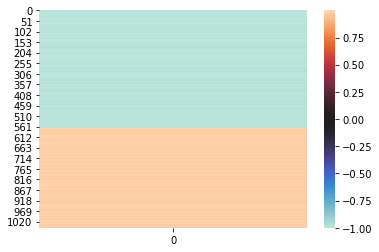

metacluster_0
activity pattern: [-1]
metacluster_0 pattern_0
total seqlets: 63
Task 0 hypothetical scores:


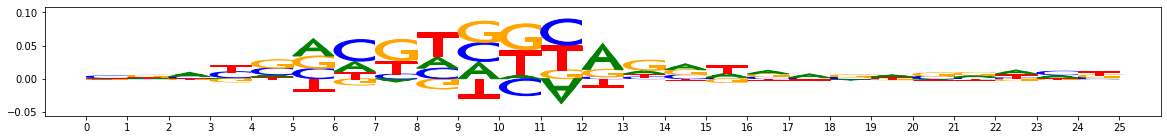

Task 0 actual importance scores:


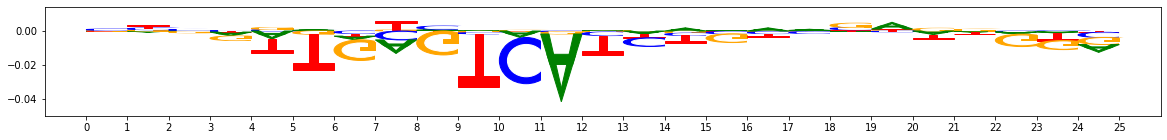

onehot, fwd and rev:


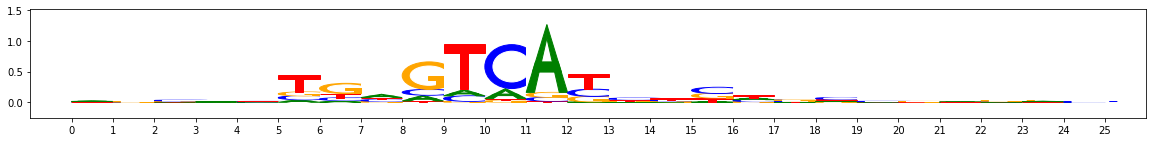

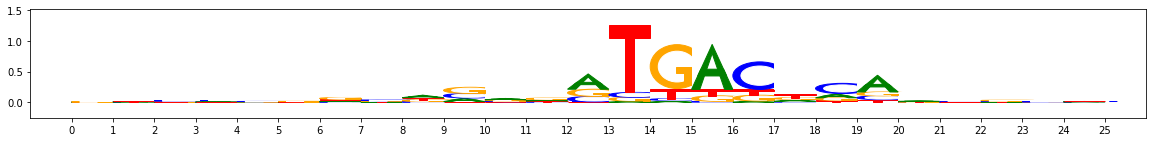

PLOTTING SUBCLUSTERS


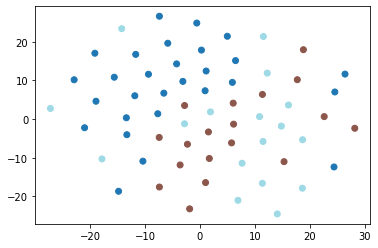

subcluster_0 size 28


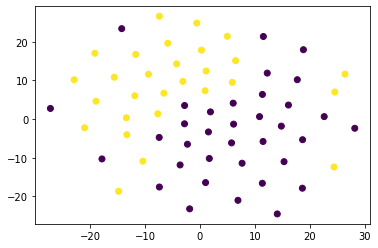

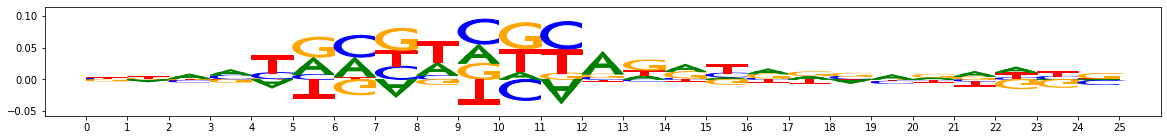

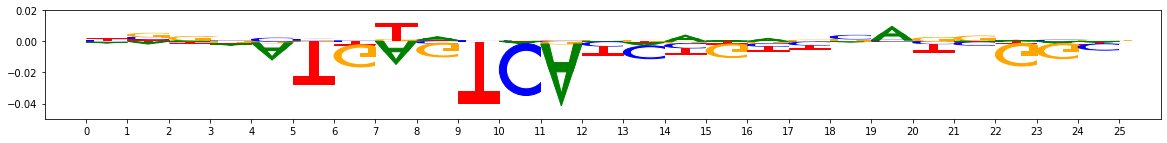

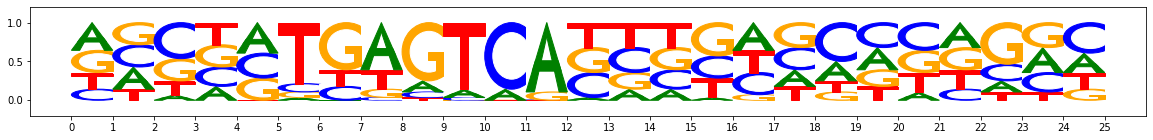

subcluster_1 size 18


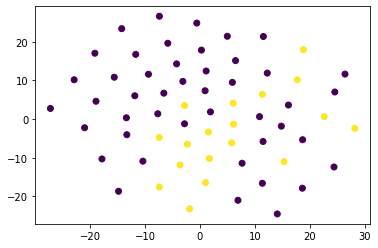

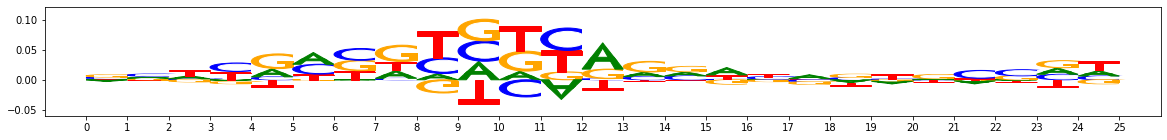

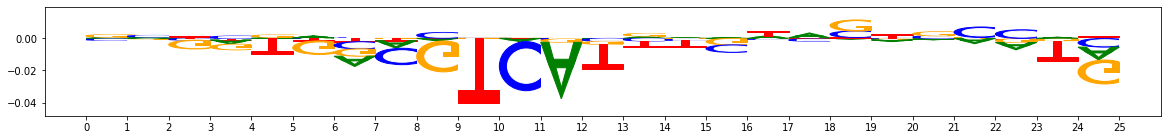

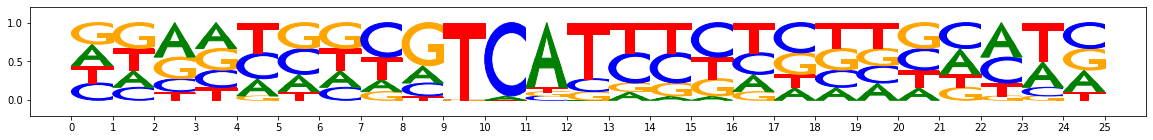

subcluster_2 size 17


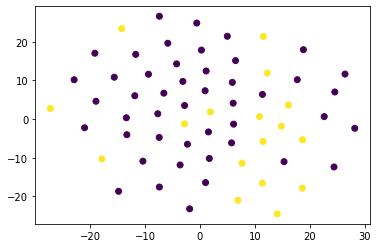

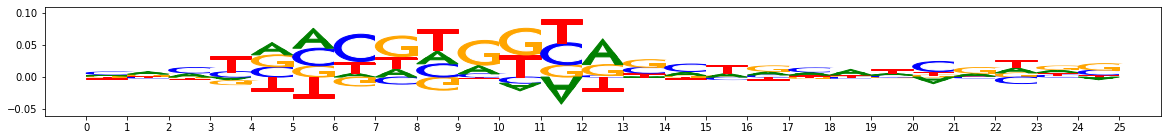

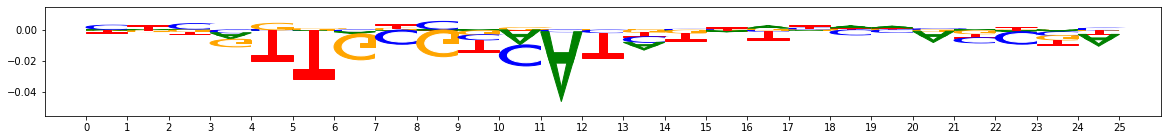

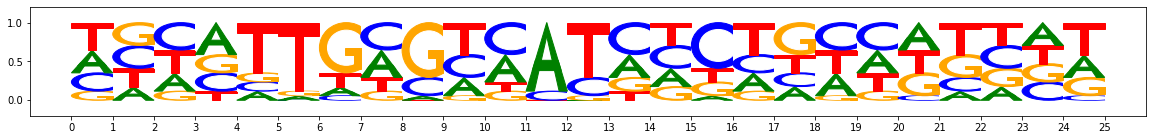

metacluster_0 pattern_1
total seqlets: 63
Task 0 hypothetical scores:


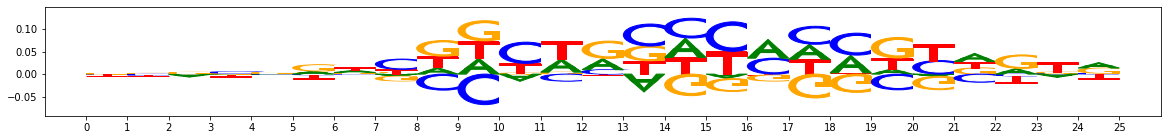

Task 0 actual importance scores:


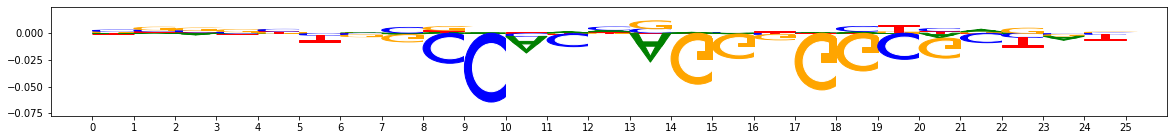

onehot, fwd and rev:


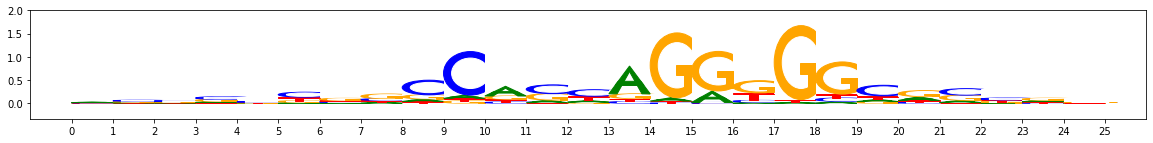

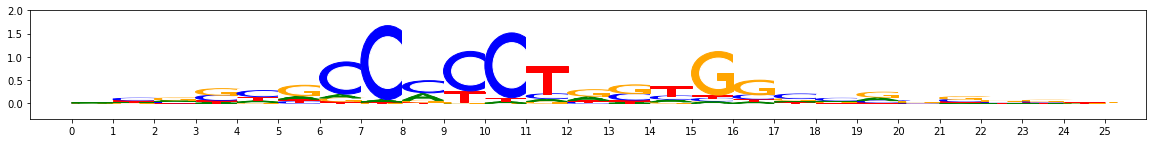

PLOTTING SUBCLUSTERS


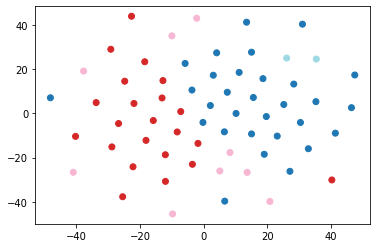

subcluster_0 size 30


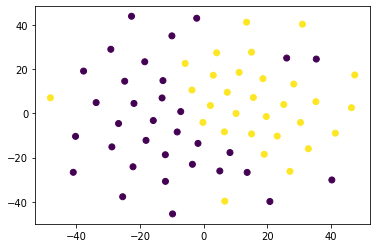

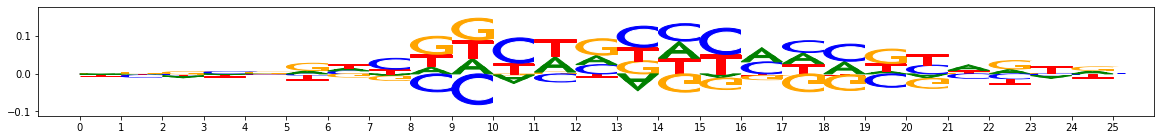

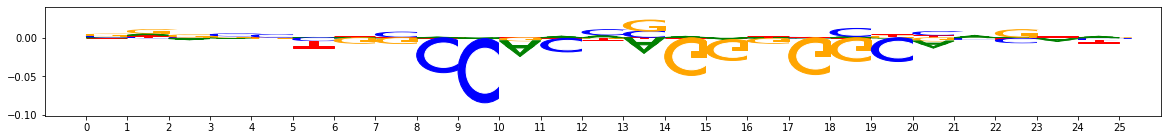

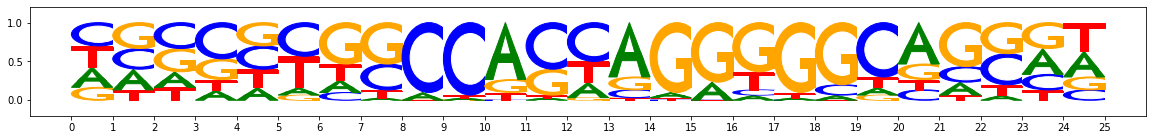

subcluster_1 size 22


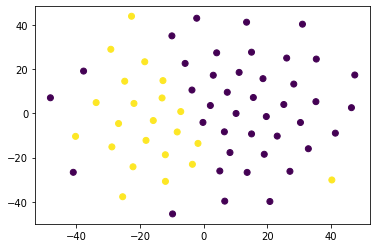

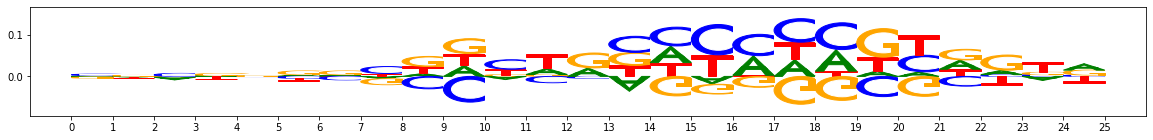

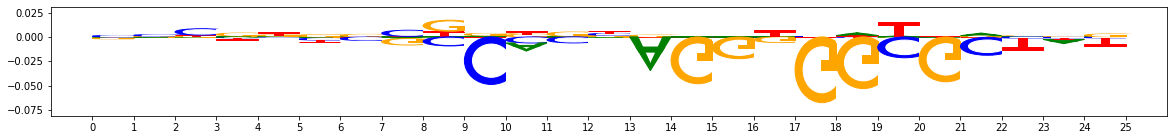

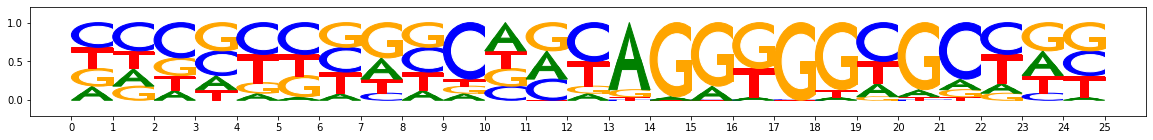

subcluster_2 size 9


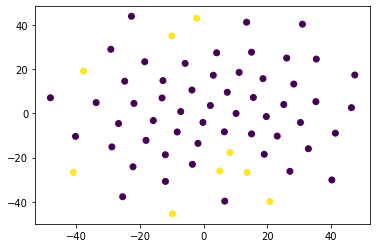

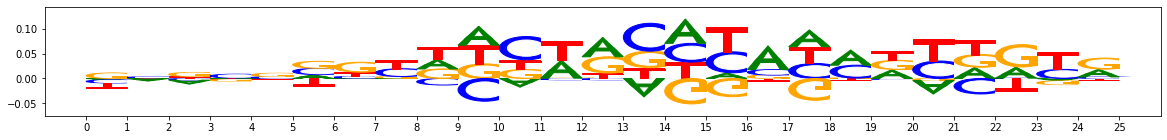

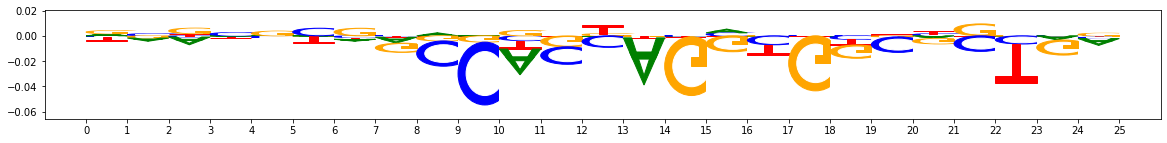

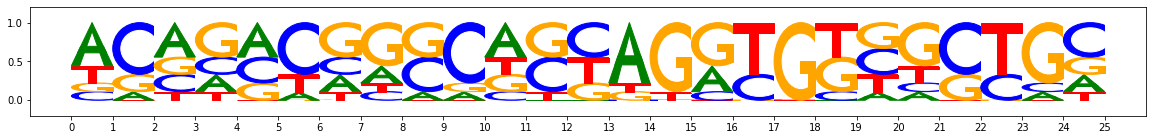

subcluster_3 size 2


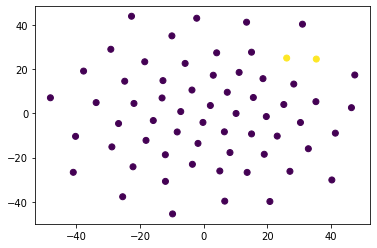

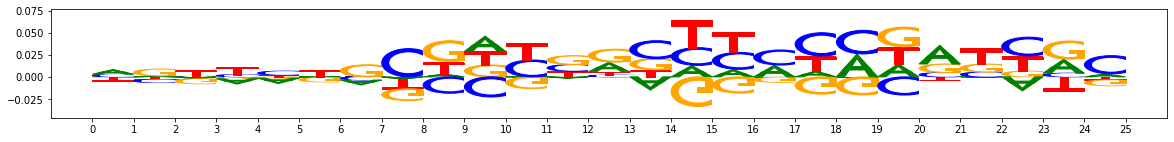

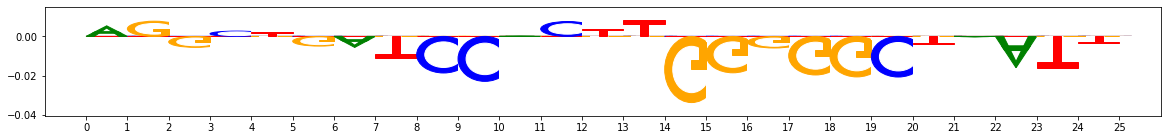

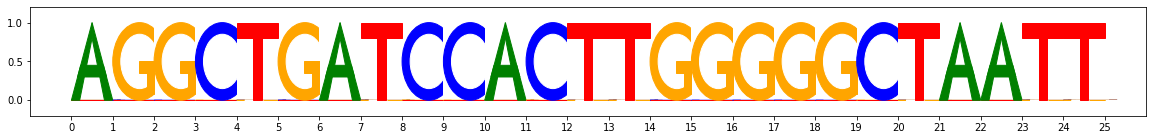

metacluster_0 pattern_2
total seqlets: 49
Task 0 hypothetical scores:


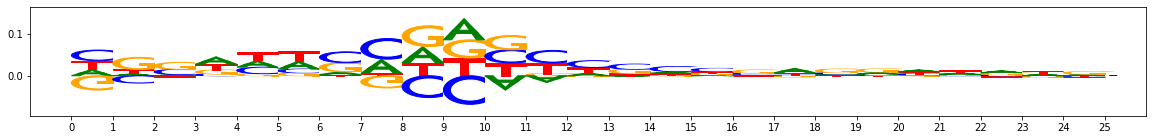

Task 0 actual importance scores:


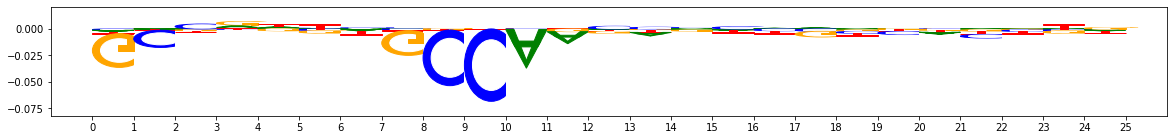

onehot, fwd and rev:


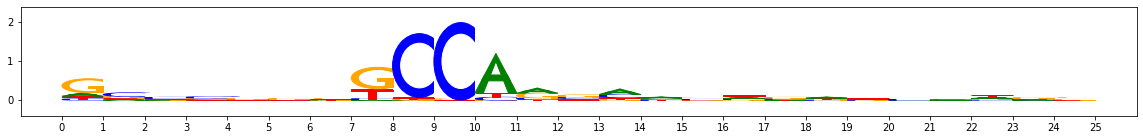

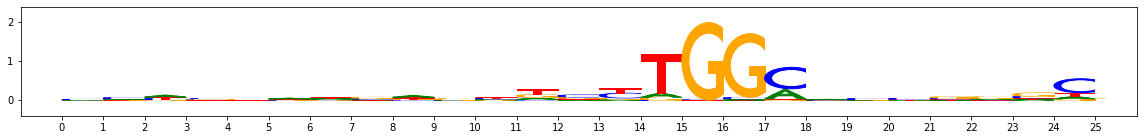

PLOTTING SUBCLUSTERS


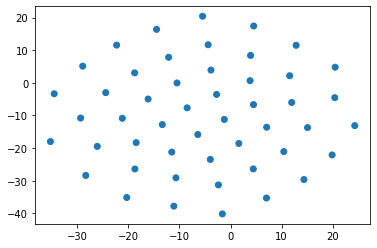

subcluster_0 size 49


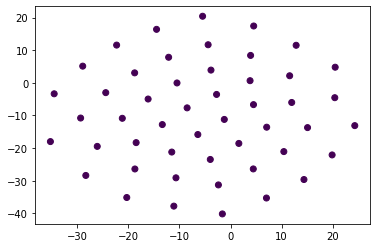

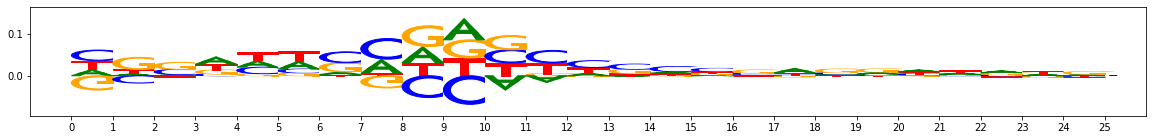

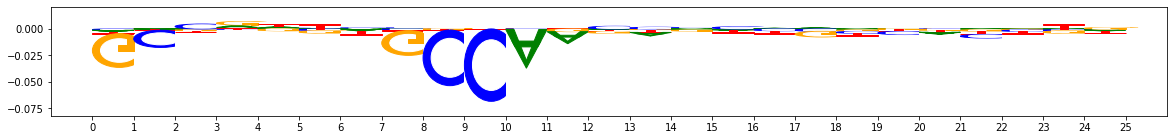

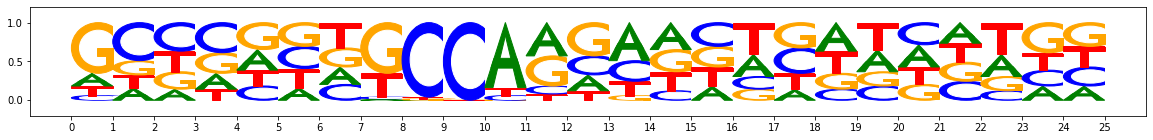

metacluster_0 pattern_3
total seqlets: 39
Task 0 hypothetical scores:


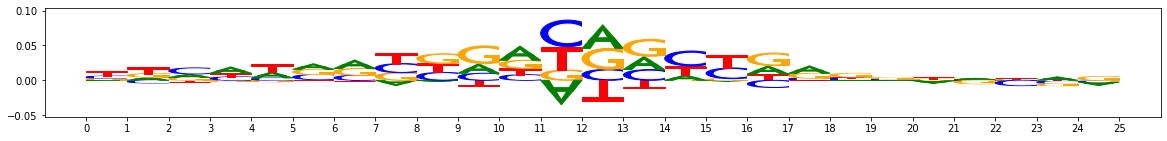

Task 0 actual importance scores:


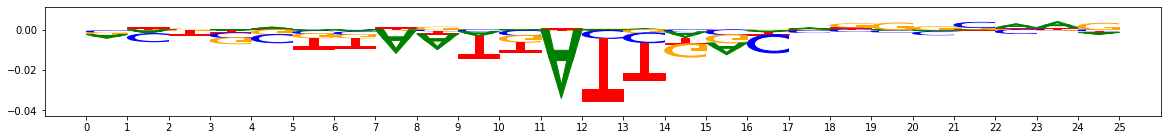

onehot, fwd and rev:


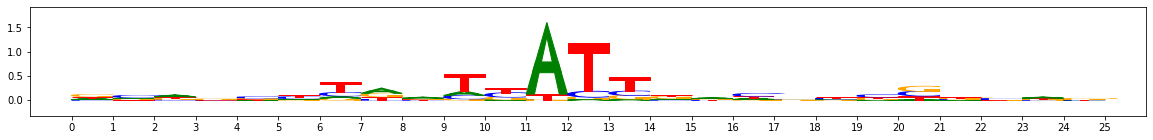

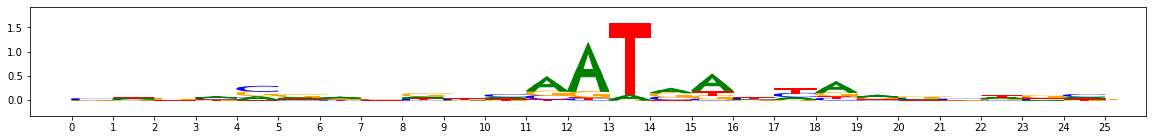

PLOTTING SUBCLUSTERS


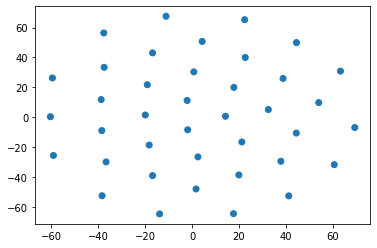

subcluster_0 size 39


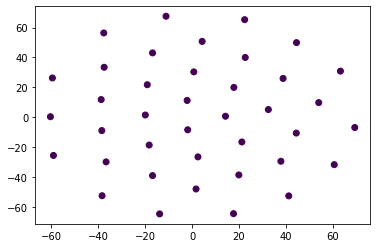

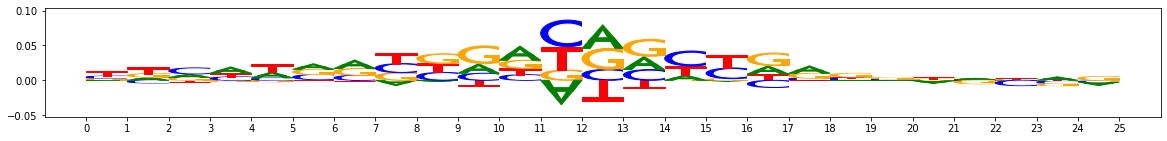

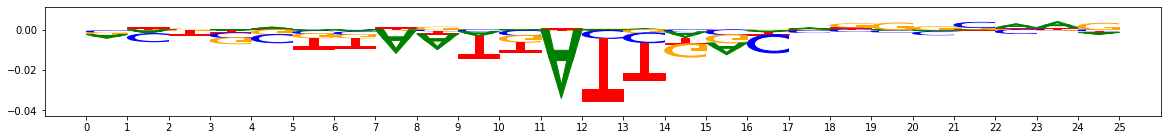

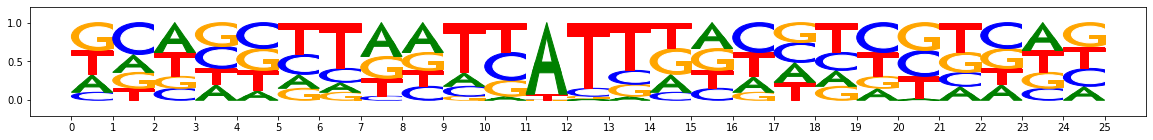

metacluster_0 pattern_4
total seqlets: 38
Task 0 hypothetical scores:


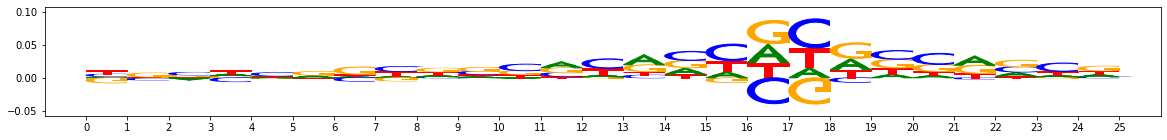

Task 0 actual importance scores:


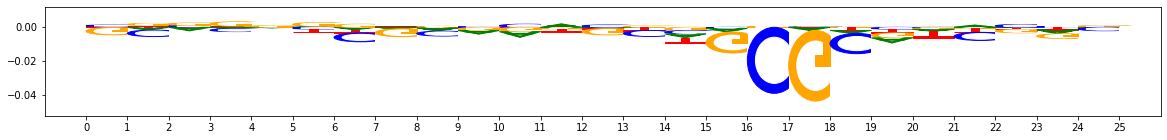

onehot, fwd and rev:


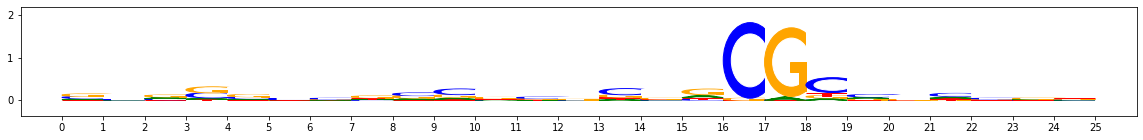

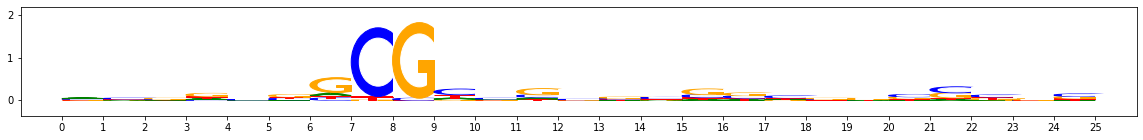

PLOTTING SUBCLUSTERS


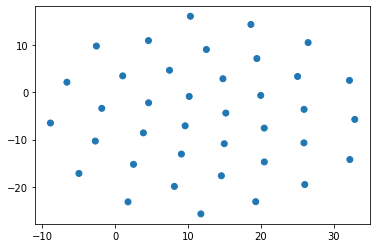

subcluster_0 size 38


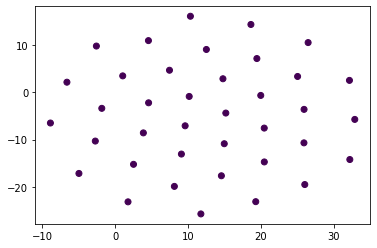

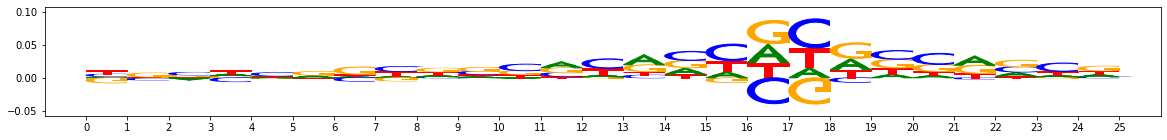

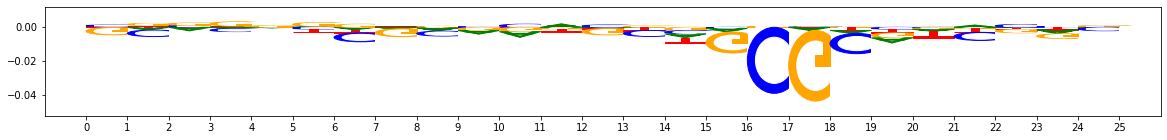

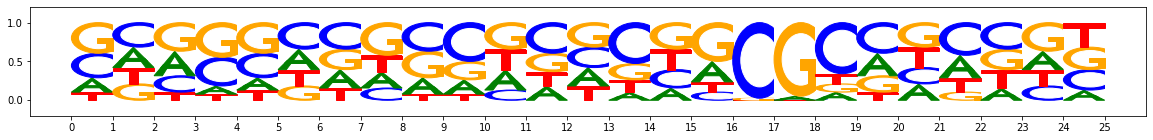

metacluster_0 pattern_5
total seqlets: 31
Task 0 hypothetical scores:


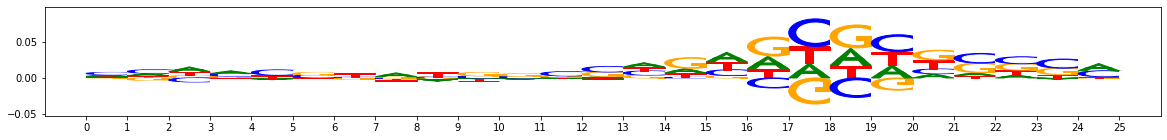

Task 0 actual importance scores:


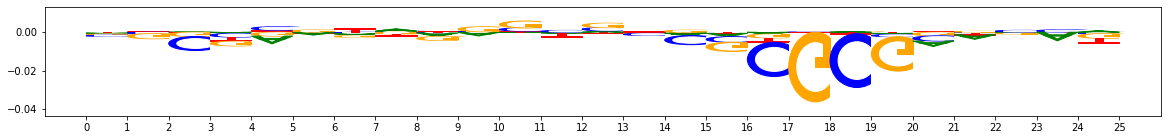

onehot, fwd and rev:


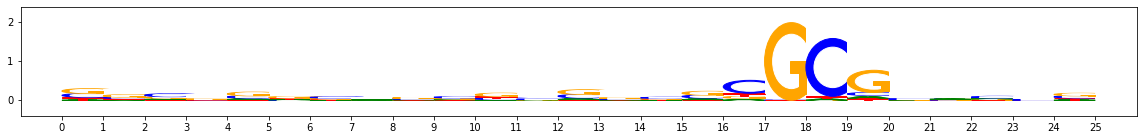

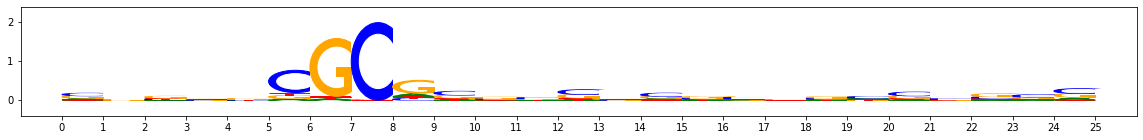

PLOTTING SUBCLUSTERS


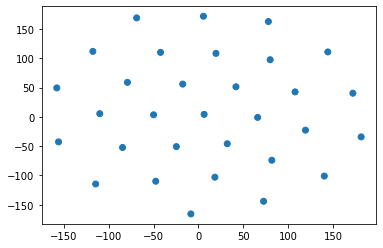

subcluster_0 size 31


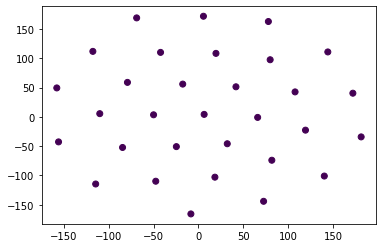

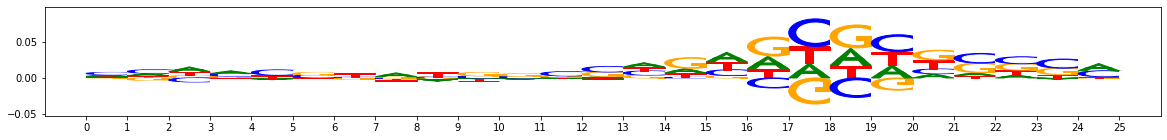

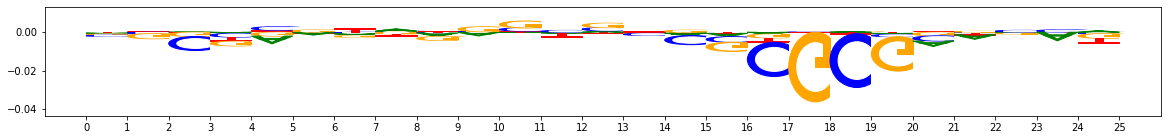

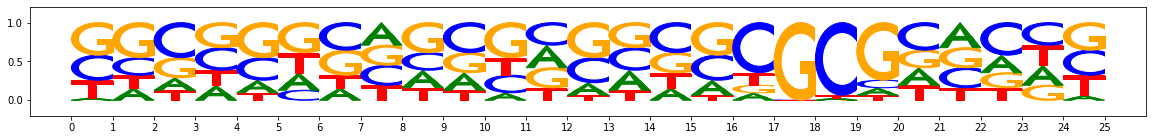

metacluster_1
activity pattern: [1]
metacluster_1 pattern_0
total seqlets: 38
Task 0 hypothetical scores:


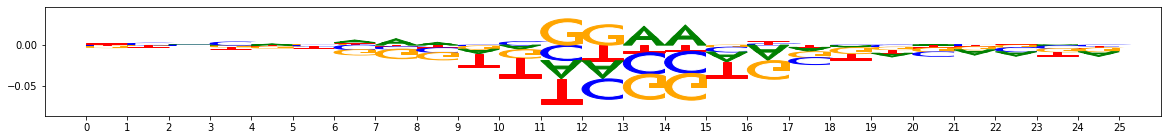

Task 0 actual importance scores:


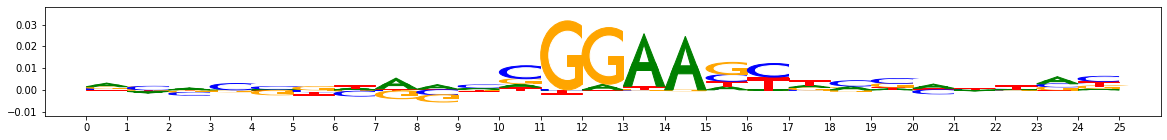

onehot, fwd and rev:


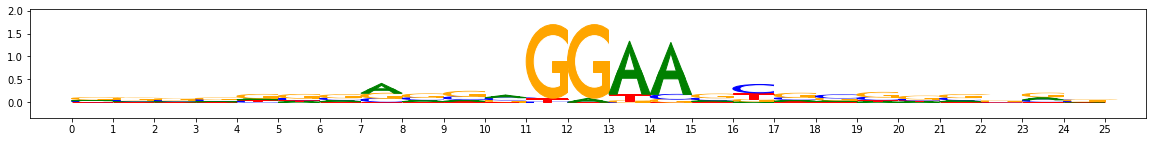

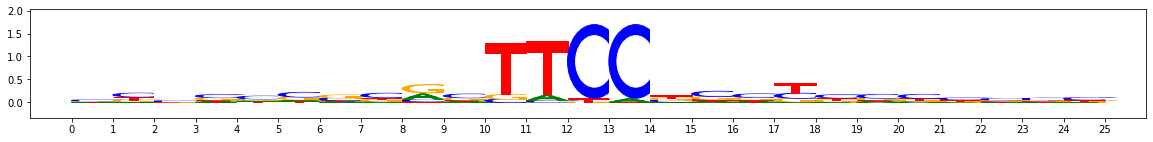

PLOTTING SUBCLUSTERS


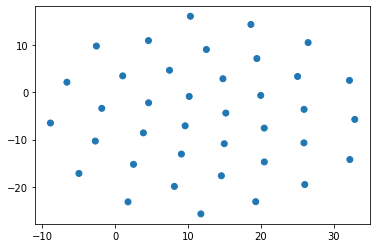

subcluster_0 size 38


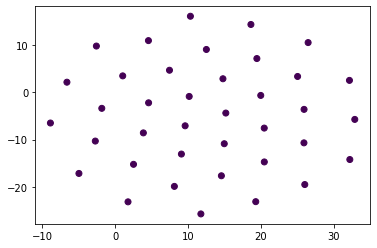

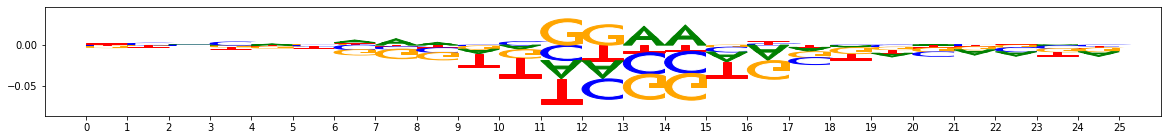

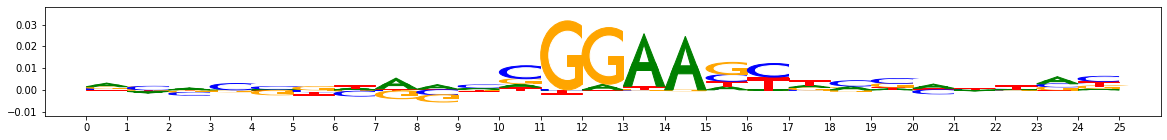

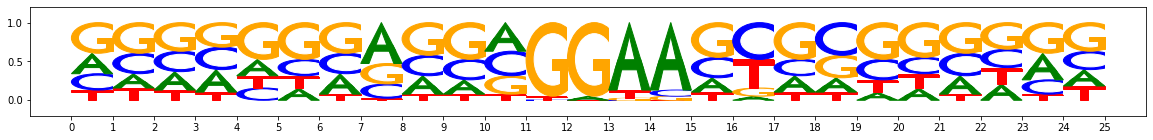

metacluster_1 pattern_1
total seqlets: 36
Task 0 hypothetical scores:


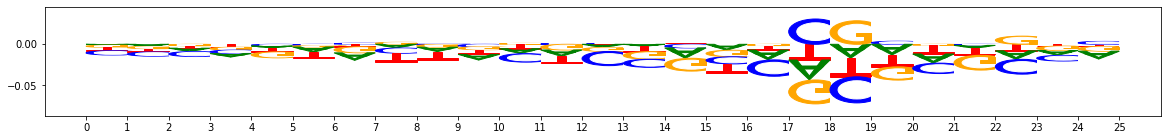

Task 0 actual importance scores:


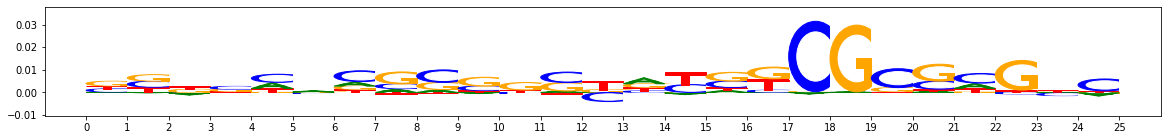

onehot, fwd and rev:


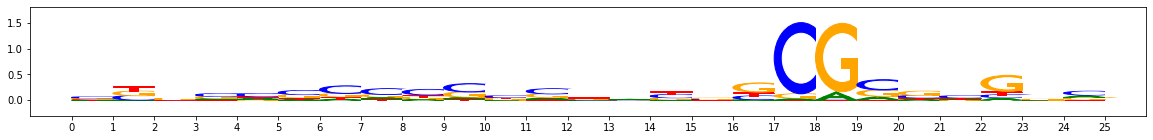

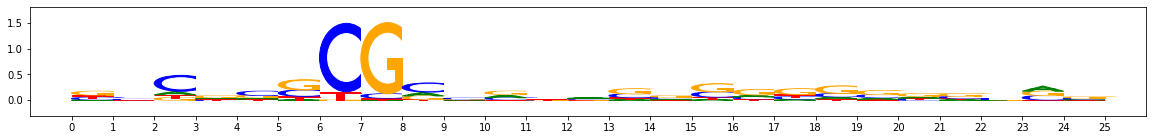

PLOTTING SUBCLUSTERS


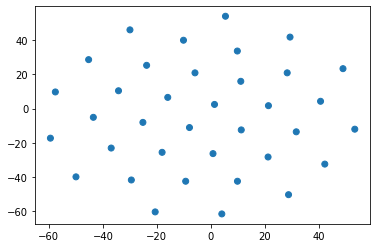

subcluster_0 size 36


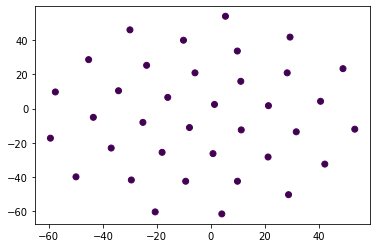

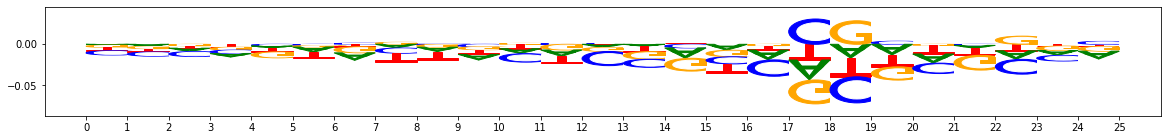

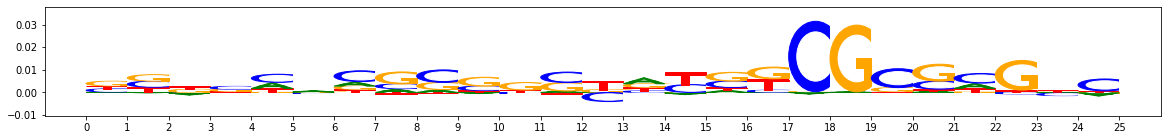

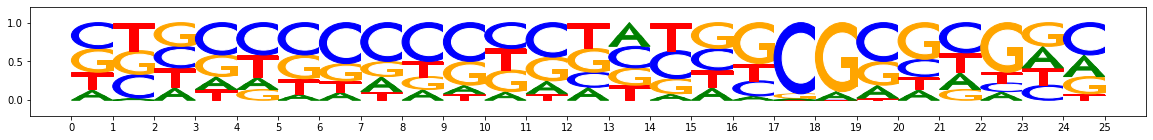

metacluster_1 pattern_2
total seqlets: 34
Task 0 hypothetical scores:


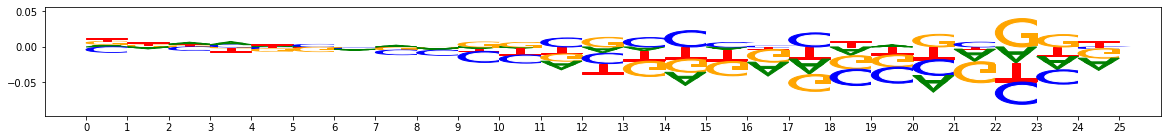

Task 0 actual importance scores:


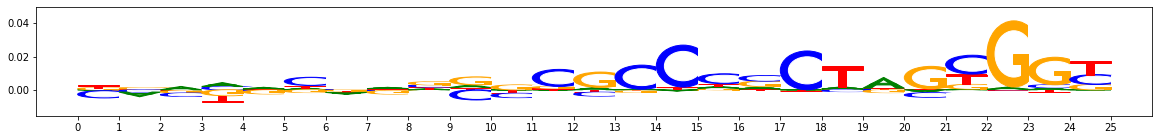

onehot, fwd and rev:


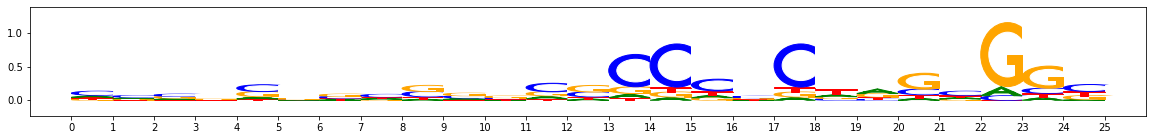

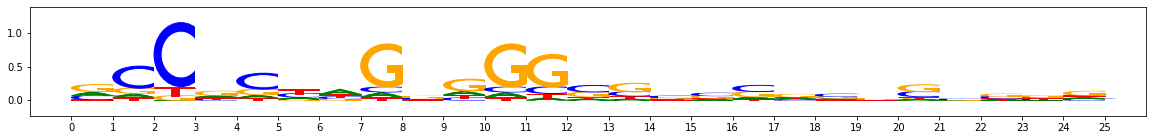

PLOTTING SUBCLUSTERS


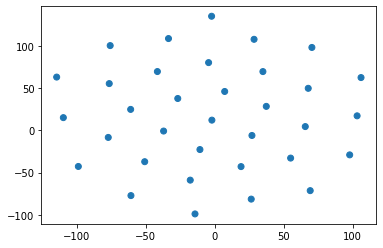

subcluster_0 size 34


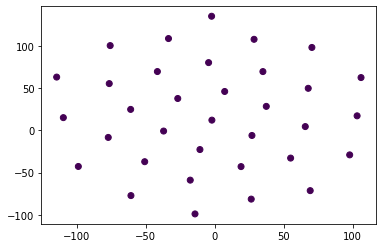

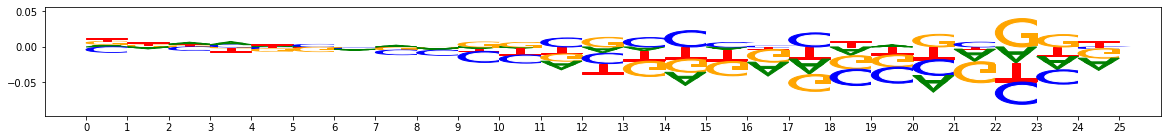

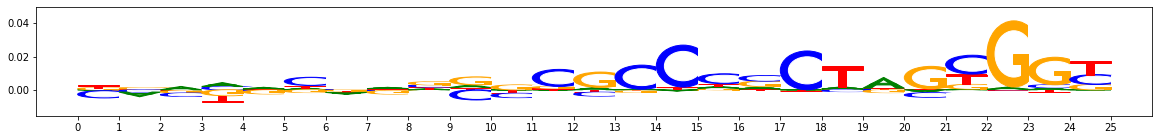

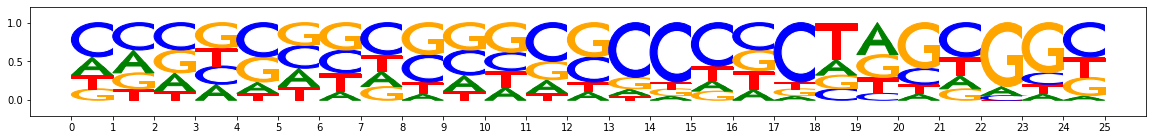

metacluster_1 pattern_3
total seqlets: 32
Task 0 hypothetical scores:


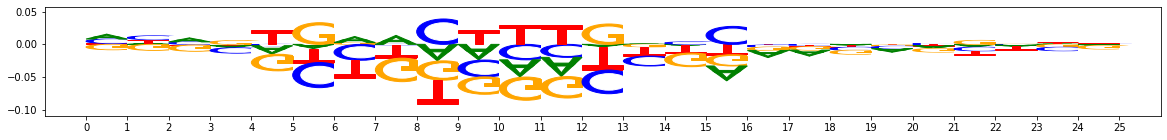

Task 0 actual importance scores:


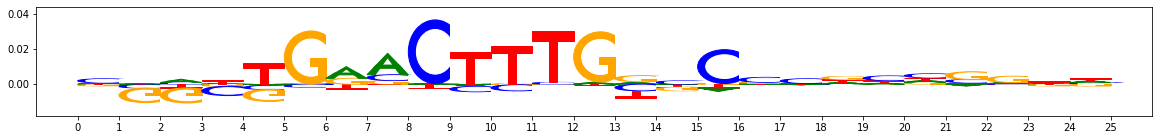

onehot, fwd and rev:


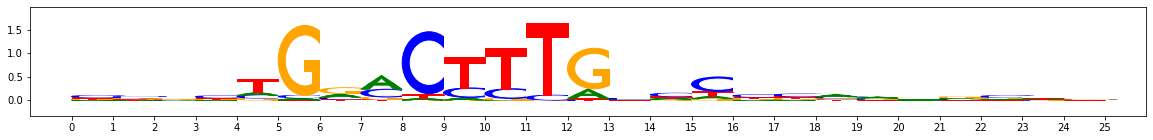

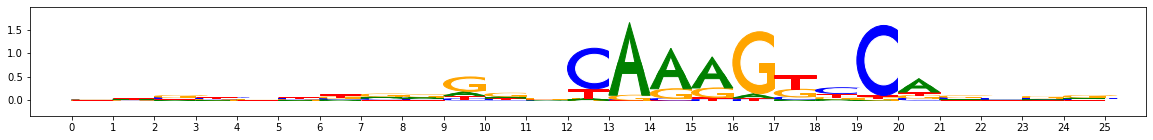

PLOTTING SUBCLUSTERS


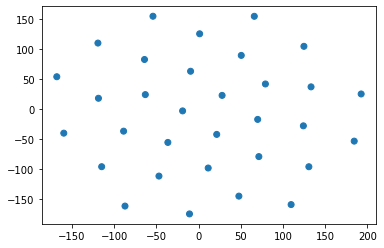

subcluster_0 size 32


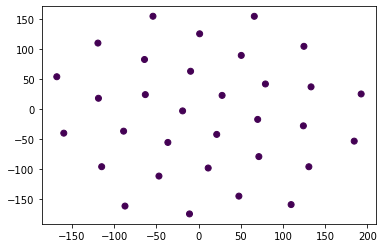

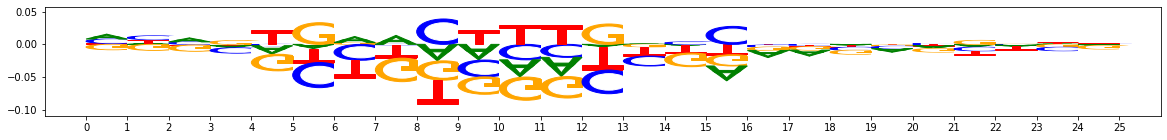

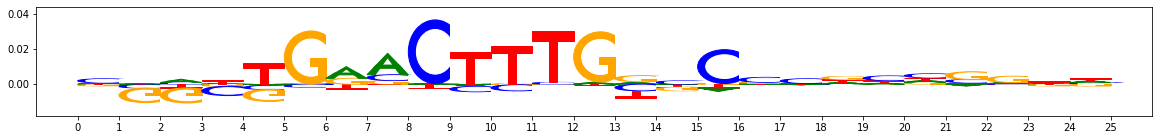

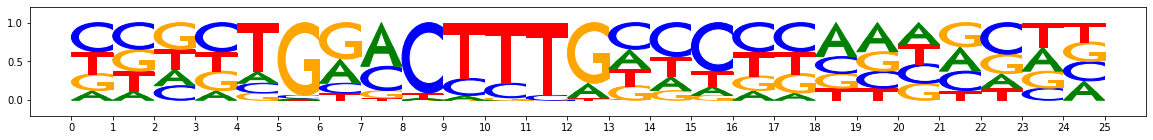

metacluster_1 pattern_4
total seqlets: 31
Task 0 hypothetical scores:


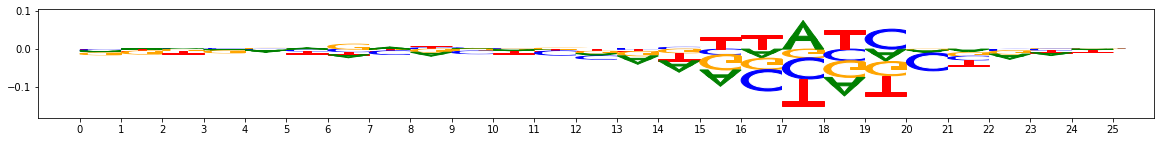

Task 0 actual importance scores:


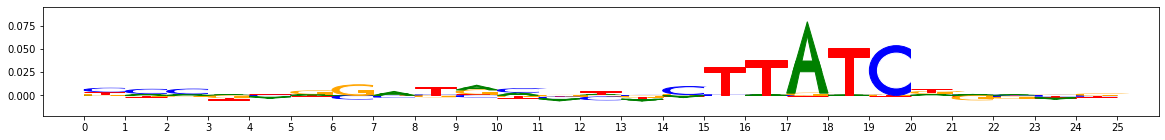

onehot, fwd and rev:


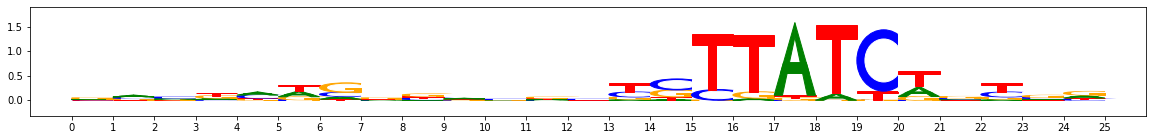

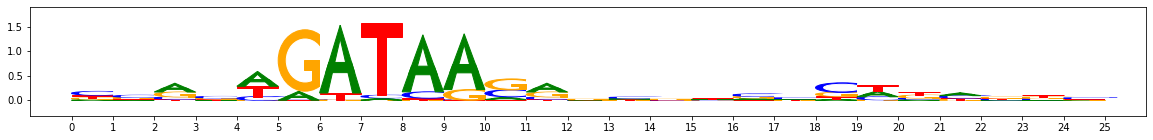

PLOTTING SUBCLUSTERS


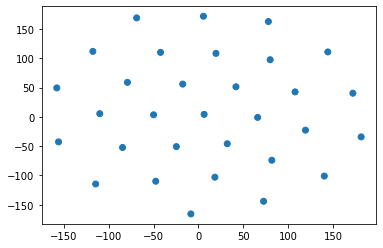

subcluster_0 size 31


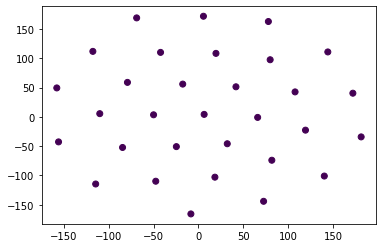

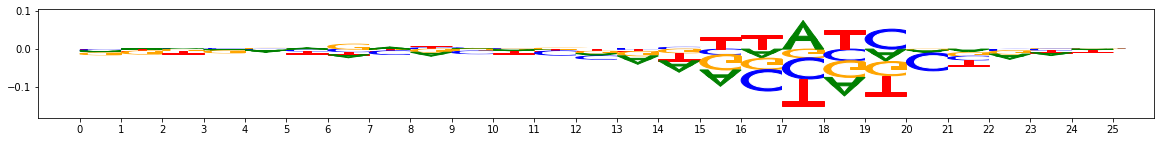

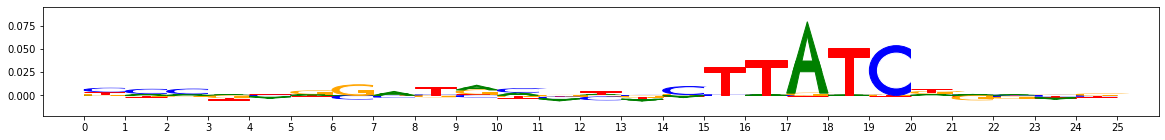

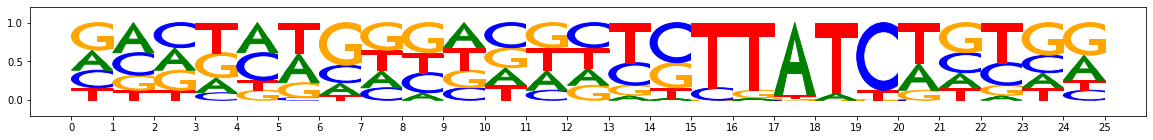

In [12]:
from collections import Counter
import numpy as np

from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

hdf5_results = h5py.File("results.hdf5","r")

print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        #print("Task 1 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task1_hypothetical_contribs"]["fwd"])
        #print("Task 1 actual importance scores:")
        #viz_sequence.plot_weights(pattern["task1_contrib_scores"]["fwd"])
        #print("Task 2 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task2_hypothetical_contribs"]["fwd"])
        #print("Task 2 actual importance scores:")
        #viz_sequence.plot_weights(pattern["task2_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 
        if ("subclusters" in pattern):
            print("PLOTTING SUBCLUSTERS")
            subclusters = np.array(pattern["subclusters"])
            twod_embedding = np.array(pattern["twod_embedding"])
            plt.scatter(twod_embedding[:,0], twod_embedding[:,1], c=subclusters, cmap="tab20")
            plt.show()
            for subcluster_name in list(pattern["subcluster_to_subpattern"]["subcluster_names"]):
                subpattern = pattern["subcluster_to_subpattern"][subcluster_name]
                print(subcluster_name.decode("utf-8"), "size", len(subpattern["seqlets_and_alnmts"]["seqlets"]))
                subcluster = int(subcluster_name.decode("utf-8").split("_")[1])
                plt.scatter(twod_embedding[:,0], twod_embedding[:,1], c=(subclusters==subcluster))
                plt.show()
                viz_sequence.plot_weights(subpattern["task0_hypothetical_contribs"]["fwd"])
                viz_sequence.plot_weights(subpattern["task0_contrib_scores"]["fwd"])
                viz_sequence.plot_weights(subpattern["sequence"]["fwd"])
hdf5_results.close()